# Predict Home Value of Zillow Listings

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy import stats

import sklearn
import sklearn.metrics
import sklearn.linear_model

import wrangle as wr
import split_scale as ss
import explore as ex
import evaluate as ev

import warnings
warnings.filterwarnings("ignore")

In [2]:
# properties_query = """
# SELECT id, parcelid, bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fips, unitcnt, taxvaluedollarcnt, taxamount, (taxamount/taxvaluedollarcnt) as tax_rate
# FROM properties_2017
# WHERE unitcnt = 1;
# """

In [3]:
# properties = pd.read_sql(properties_query, url)
# properties

In [4]:
# predictions_query = """
# SELECT parcelid, MAX(transactiondate) as last_transaction_date
# FROM predictions_2017
# WHERE transactiondate >= "2017-05-01"
# AND transactiondate <= "2017-06-30"
# GROUP BY parcelid
# ORDER BY last_transaction_date;
# """

In [5]:
# predictions = pd.read_sql(predictions_query, url)
# predictions

In [6]:
# joined_query = """
# SELECT prop.id, prop.parcelid, prop.bathroomcnt, prop.bedroomcnt, prop.calculatedfinishedsquarefeet, prop.fips, prop.unitcnt, prop.taxvaluedollarcnt, prop.taxamount, (prop.taxamount/prop.taxvaluedollarcnt) as taxrate, pred.transactiondate
# FROM properties_2017 as prop
# JOIN predictions_2017 as pred USING(parcelid)
# WHERE prop.unitcnt = 1
# AND pred.transactiondate >= "2017-05-01"
# AND pred.transactiondate <= "2017-06-30"
# ORDER BY pred.transactiondate;
# """

In [7]:
# joined = pd.read_sql(joined_query, url)
# joined

In [8]:
# alternate_joined_query = """SELECT prop.id, prop.parcelid, prop.bathroomcnt, prop.bedroomcnt, prop.calculatedfinishedsquarefeet, prop.fips, prop.propertylandusetypeid, prop.unitcnt, prop.taxvaluedollarcnt, prop.taxamount, (prop.taxamount/prop.taxvaluedollarcnt) as tax_rate, pred.transactiondate
# FROM properties_2017 as prop
# JOIN predictions_2017 as pred USING(parcelid)
# WHERE prop.propertylandusetypeid = 261;
# """

In [9]:
# alt_joined = pd.read_sql(alternate_joined_query, url)
# alt_joined

In [10]:
# new_query = """SELECT prop.id, prop.parcelid, prop.bathroomcnt, prop.bedroomcnt, prop.calculatedfinishedsquarefeet, prop.fips, prop.propertylandusetypeid, plut.propertylandusedesc, prop.unitcnt, prop.taxvaluedollarcnt, prop.taxamount, (prop.taxamount/prop.taxvaluedollarcnt) as tax_rate, pred.transactiondate
# FROM properties_2017 as prop
# JOIN predictions_2017 as pred USING(parcelid)
# JOIN propertylandusetype as plut USING(propertylandusetypeid)
# WHERE prop.propertylandusetypeid = 261
# AND pred.transactiondate >= "2017-05-01"
# AND pred.transactiondate <= "2017-06-30"
# ORDER BY pred.transactiondate;
# """

In [11]:
# new_df = pd.read_sql(new_query, url)
# new_df

---

In [12]:
# url = env.get_db_url("zillow")

In [13]:
# zillow_query = """SELECT prop.bathroomcnt, prop.bedroomcnt, prop.calculatedfinishedsquarefeet, prop.fips, plut.propertylandusedesc, prop.taxvaluedollarcnt, prop.taxamount, (prop.taxamount/prop.taxvaluedollarcnt) as tax_rate, pred.transactiondate
# FROM properties_2017 as prop
# JOIN predictions_2017 as pred USING(parcelid)
# JOIN propertylandusetype as plut USING(propertylandusetypeid)
# WHERE prop.propertylandusetypeid = 261
# AND pred.transactiondate >= "2017-05-01"
# AND pred.transactiondate <= "2017-06-30"
# ORDER BY pred.transactiondate;
# """

In [14]:
# df = pd.read_sql(zillow_query, url)
# df

In [15]:
# df["fips"] = df["fips"].astype("int")

In [16]:
# df.info()

In [17]:
# df

In [18]:
# df.fips.value_counts()

In [19]:
# df["county"] = df["fips"].map({6037: "Los Angeles County", 6059: "Orange County", 6111: "Ventura County"})
# df

In [20]:
# df.to_csv("zillow_data")

In [21]:
# df = pd.merge(final_df, california_fips, left_on="fips", right_on="06000", how="left")
# df

In [22]:
# df.California.value_counts()

In [23]:
# df.propertylandusedesc.value_counts()

In [24]:
# df.drop(columns="06000", inplace=True)
# df

In [25]:
# df.rename(columns={"bathroomcnt": "bathrooms", "bedroomcnt": "bedrooms", "calculatedfinishedsquarefeet": "square_feet", "fips": "fips_code", "propertylandusedesc": "property_description", "taxvaluedollarcnt": "tax_value", "taxamount": "tax_amount", "transactiondate": "transaction_date", "California": "county"}, inplace=True)

In [26]:
# df

In [27]:
# df = df.dropna()

In [28]:
# df.info()

In [29]:
# df.describe()

In [30]:
# california_fips = pd.read_csv("california_fips.csv")
# california_fips.drop(columns="Unnamed: 0", inplace=True)
# california_fips.head()

In [31]:
# def wrangle_zillow():
#     df = pd.read_sql(zillow_query, url)
#     california_fips = pd.read_csv("california_fips.csv")
#     california_fips.drop(columns="Unnamed: 0", inplace=True)
#     df = pd.merge(final_df, california_fips, left_on="fips", right_on="06000", how="left")
#     df.drop(columns="06000", inplace=True)
#     df.rename(columns={"bathroomcnt": "bathrooms", "bedroomcnt": "bedrooms", "calculatedfinishedsquarefeet": "square_feet", "fips": "fips_code", "propertylandusedesc": "property_description", "taxvaluedollarcnt": "tax_value", "taxamount": "tax_amount", "transactiondate": "transaction_date", "California": "county"}, inplace=True)
#     df = df.dropna()
#     return df

In [2]:
df = wr.wrangle_zillow()
df

,bathrooms,bedrooms,square_feet,fips_code,property_description,home_value,tax_amount,tax_rate,transaction_date,county
0,2.5,3.0,1653.0,6059,Single Family Residential,605000.0,6185.28,0.010224,2017-05-01,Orange County
1,3.0,3.0,1572.0,6037,Single Family Residential,404060.0,4934.43,0.012212,2017-05-01,Los Angeles County
2,3.0,4.0,3041.0,6037,Single Family Residential,245311.0,2963.65,0.012081,2017-05-01,Los Angeles County
3,2.0,3.0,1692.0,6037,Single Family Residential,649169.0,8063.11,0.012421,2017-05-01,Los Angeles County
4,2.0,4.0,1611.0,6037,Single Family Residential,89640.0,1144.73,0.012770,2017-05-01,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...
14984,3.0,5.0,2526.0,6059,Single Family Residential,458903.0,5718.72,0.012462,2017-06-30,Orange County
14985,3.0,5.0,2735.0,6059,Single Family Residential,115387.0,1465.88,0.012704,2017-06-30,Orange County
14986,2.0,3.0,1536.0,6037,Single Family Residential,297097.0,3519.78,0.011847,2017-06-30,Los Angeles County
14987,3.0,5.0,2655.0,6059,Single Family Residential,746963.0,8065.50,0.010798,2017-06-30,Orange County


### Data Dictionary
- **bathrooms**:
    - The number of bathrooms in each home
    - zillow SQL database field: properties_2017.bathroomcnt
    - Homes with zero bathrooms were filtered out in my SQL query
    - I chose this field to represent the number of bathrooms per home as it appears to be the most complete and appropriate field in the database
- **bedrooms**:
    - The number of bedrooms in each home
    - zillow SQL database field: properties_2017.bedroomcnt
    - Homes with zero bedrooms were filtered out in my SQL query
    - I chose this field to represent the number of bedrooms per home as it appears to be the most complete and appropriate field in the database
- **square_feet**:
    - The square footage of each home
    - zillow SQL database field: properties_2017.calculatedfinishedsquarefeet
    - I chose this field to represent square footage per home as it appears to be the most complete and appropriate field in the database
- **fips_code**:
    - The Federal Information Processing System (FIPS) code for each home. Essentially, this is a state and county unique identifier established by the Federal Communications Commission (FCC)
    - zillow SQL database field: properties_2017.fips
    - I chose to use this field to index the county in which each home is located 
- **property_description**:
    - The property description of each home
    - zillow SQL database field: propertylandusetype.propertylandusedesc
    - I filtered the data in my SQL query to include Single Family Residential properties only
    - I chose to use and filter by this field as I interpreted the term "single unit properties" from the project specifications to mean Single Family Residential properties
- **home_value**:
    - The property's tax assessed value in 2017, presumably
    - zillow SQL database field: properties_2017.taxvaluedollarcnt
    - I used this field to represent home_value as suggested in the project specifications
- **tax_amount**:
    - The amount of tax paid on each property in 2017, presumably
    - zillow SQL database field: properties_2017.taxamount
    - I used this field to represent tax_amount and calculate the tax rate for each property
- **tax_rate**:
    - The tax rate for each property in 2017, presumably
    - zillow SQL database fields: (properties_2017.taxamount/properties_2017.taxvaluedollarcnt) as tax_rate
    - I used the fields above to calculate the tax_rate for each property
- **transaction_date**:
    - The last transaction date for each property
    - zillow SQL database field: predictions_2017.transactiondate
    - I filtered the data in my SQL query to include only those homes whose last transaction date was in the "hot months" of May and June in terms of real estate demand as per the project specifications
    - I chose to use and filter by this field as appears to be the most appropriate date field in the database
- **transaction_date**:
    - The county in which each property is located
    - This field was indexed using the FIPS codes provided by the FCC as mentioned above
    - I chose to include this field in my DataFrame it will be used to plot the distribution of tax rates by county

In [3]:
df.bathrooms.value_counts()

2.0     6181
3.0     3114
1.0     2646
2.5     1155
4.0      671
3.5      302
1.5      240
5.0      233
4.5      217
6.0      102
5.5       65
7.0       25
6.5       15
8.0       14
7.5        4
9.0        3
11.0       1
10.0       1
Name: bathrooms, dtype: int64

In [4]:
df.bedrooms.value_counts()

3.0     6664
4.0     4422
2.0     2350
5.0     1158
6.0      183
1.0      177
7.0       27
12.0       3
9.0        2
11.0       1
10.0       1
8.0        1
Name: bedrooms, dtype: int64

In [35]:
# df.reset_index(inplace=True)

In [5]:
df

,bathrooms,bedrooms,square_feet,fips_code,property_description,home_value,tax_amount,tax_rate,transaction_date,county
0,2.5,3.0,1653.0,6059,Single Family Residential,605000.0,6185.28,0.010224,2017-05-01,Orange County
1,3.0,3.0,1572.0,6037,Single Family Residential,404060.0,4934.43,0.012212,2017-05-01,Los Angeles County
2,3.0,4.0,3041.0,6037,Single Family Residential,245311.0,2963.65,0.012081,2017-05-01,Los Angeles County
3,2.0,3.0,1692.0,6037,Single Family Residential,649169.0,8063.11,0.012421,2017-05-01,Los Angeles County
4,2.0,4.0,1611.0,6037,Single Family Residential,89640.0,1144.73,0.012770,2017-05-01,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...
14984,3.0,5.0,2526.0,6059,Single Family Residential,458903.0,5718.72,0.012462,2017-06-30,Orange County
14985,3.0,5.0,2735.0,6059,Single Family Residential,115387.0,1465.88,0.012704,2017-06-30,Orange County
14986,2.0,3.0,1536.0,6037,Single Family Residential,297097.0,3519.78,0.011847,2017-06-30,Los Angeles County
14987,3.0,5.0,2655.0,6059,Single Family Residential,746963.0,8065.50,0.010798,2017-06-30,Orange County


In [37]:
# df.drop(columns="index", inplace=True)
# df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15011 entries, 0 to 15010
Data columns (total 10 columns):
bathrooms               15011 non-null float64
bedrooms                15011 non-null float64
square_feet             15011 non-null float64
fips_code               15011 non-null int64
property_description    15011 non-null object
tax_value               15011 non-null float64
tax_amount              15011 non-null float64
tax_rate                15011 non-null float64
transaction_date        15011 non-null object
county                  15011 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
print((df["bathrooms"] > 0).all())
print((df["bedrooms"] > 0).all())
print((df["square_feet"] > 0).all())
print((df["fips_code"] > 0).all())
print((df["property_description"].isnull().sum()))
print((df["home_value"] > 0).all())
print((df["tax_amount"] > 0).all())


True
True
True
True
0
True
True


<Figure size 1152x576 with 0 Axes>

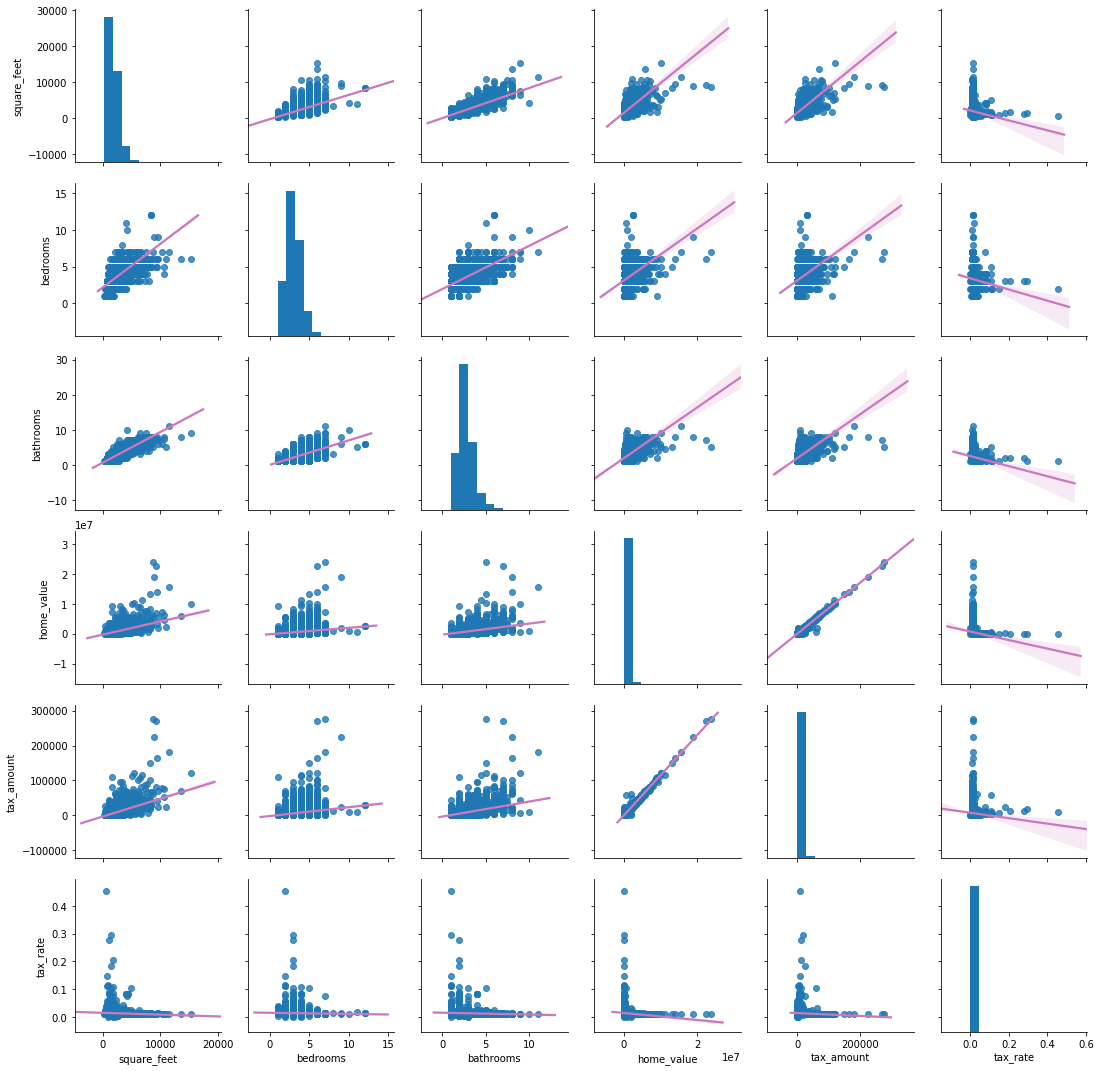

In [8]:
plt.figure(figsize=(16, 8))
sns.pairplot(data=df, vars=["square_feet", "bedrooms", "bathrooms", "home_value", "tax_amount", "tax_rate"], kind="reg", plot_kws={"line_kws": {"color": sns.color_palette("colorblind")[4]}})
plt.show()